In [1]:
# Task 4 
"""
    Download the following dataset (PASHTO-HW-DATASET from kaggle)
    and train it with CNN network. HINT: The dataset is binary format. Save any
    trained model and burn it in Raspberry PI to classify the input images.
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
# Read the first dataset
data = pd.read_csv('pashto_alpha_num_hw.csv')

In [3]:
data.head()

,alif,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.988,0.989,0.990,0.991,0.992,0.993,0.994,0.995,0.996,0.997
0,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,183
2,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,alif,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(37869, 1025)

In [5]:
column = data.columns
column

Index(['alif', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.988', '0.989', '0.990', '0.991', '0.992', '0.993', '0.994', '0.995',
       '0.996', '0.997'],
      dtype='object', length=1025)

In [6]:
# create new dataframe images with label
label = data[column[0]].values
images = data[column[1:]].values

In [7]:
label

array(['alif', 'alif', 'alif', ..., 'las', 'las', 'las'], dtype=object)

In [8]:
images

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0, 183],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

In [9]:
# reshape the images and save in a new directory
for i, (lab, img) in enumerate(zip(label, images)):
    img = img.reshape(32, 32)
    if os.path.exists('images/{}'.format(lab)):
        cv2.imwrite('images/{}/{}.jpg'.format(lab, i), img)
    else:
        os.makedirs('images/{}'.format(lab))
        cv2.imwrite('images/{}/{}.jpg'.format(lab, i), img)

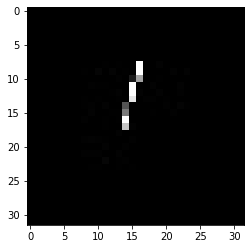

In [11]:
image1 = cv2.imread('images/alif/6.jpg')
plt.imshow(image1)

In [12]:
# Read the second dataset
df = pd.read_csv('pashto_chrs_printed.csv')
df.head()

,Label,Pixel0,Pixel1,Pixel2,Pixel3,Pixel4,Pixel5,Pixel6,Pixel7,Pixel8,...,Pixel1014,Pixel1015,Pixel1016,Pixel1017,Pixel1018,Pixel1019,Pixel1020,Pixel1021,Pixel1022,Pixel1023
0,yay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,yay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,yay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,yay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,yay,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.shape

(2568, 1025)

In [14]:
column = df.columns
column

Index(['Label', 'Pixel0', 'Pixel1', 'Pixel2', 'Pixel3', 'Pixel4', 'Pixel5',
       'Pixel6', 'Pixel7', 'Pixel8',
       ...
       'Pixel1014', 'Pixel1015', 'Pixel1016', 'Pixel1017', 'Pixel1018',
       'Pixel1019', 'Pixel1020', 'Pixel1021', 'Pixel1022', 'Pixel1023'],
      dtype='object', length=1025)

In [15]:
label = df[column[0]].values
images = df[column[1:]].values

In [16]:
label, images

(array(['yay', 'yay', 'yay', ..., 'qaaf', 'qaaf', 'qaaf'], dtype=object),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64))

In [17]:
for i, (lab, img) in enumerate(zip(label, images)):
    img = img.reshape(32, 32)
    if os.path.exists('dataset/{}'.format(lab)):
        cv2.imwrite('dataset/{}/{}.jpg'.format(lab, i), img)
    else:
        os.makedirs('dataset/{}'.format(lab))
        cv2.imwrite('dataset/{}/{}.jpg'.format(lab, i), img)

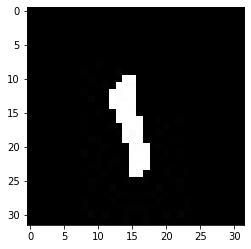

In [18]:
img = cv2.imread('dataset/alif/57.jpg')
plt.imshow(img)

## Building CNN Model

In [ ]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPooling2D
from keras import layers

def model(num_classes, input_shape):
    model = Sequential()
    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=input_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
    # Passing it to a Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))
    # 2nd Fully Connected Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    model.add(Dropout(0.5))
    # Output Layer
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [27]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import os
# Define constants
DATASET_PATH = './dataset/'
MODEL_PATH = '.'
BATCH_SIZE = 128
EPOCHS = 50
TARGET_WIDTH = 128
TARGET_HEIGHT = 128
TARGET_DEPTH = 3

In [28]:
# Set up the data generator to flow data from disk
print("[INFO] Setting up Data Generator...")
data_gen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = data_gen.flow_from_directory(
    DATASET_PATH, 
    subset='training',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)
val_generator = data_gen.flow_from_directory(
    DATASET_PATH,
    subset='validation',
    target_size = (TARGET_WIDTH, TARGET_HEIGHT),
    batch_size = BATCH_SIZE
)

[INFO] Setting up Data Generator...
Found 2076 images belonging to 44 classes.
Found 492 images belonging to 44 classes.


In [ ]:
# Build model
print("[INFO] Compiling model...")
alexnet = model(train_generator.num_classes, (TARGET_WIDTH, TARGET_HEIGHT, TARGET_DEPTH))
# Compile the model
alexnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Set the learning rate decay
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=2, min_lr=0.001)

In [12]:
# Train the network
print("[INFO] Training network ...")
H = alexnet.fit_generator(
    train_generator,
    validation_data=val_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps = val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS, verbose=1, callbacks=[reduce_lr])
# save the model to disk
print("[INFO] Serializing network...")
alexnet.save(MODEL_PATH + os.path.sep + "trained_model")
print("[INFO] Done!")

[INFO] Training network ...


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4016\3565767583.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = alexnet.fit_generator(


Epoch 1/20
16/16 [==============================] - 49s 3s/step - loss: 3.7943 - accuracy: 0.0210 - val_loss: 3.7837 - val_accuracy: 0.0234 - lr: 0.0010
Epoch 2/20
16/16 [==============================] - 46s 3s/step - loss: 3.7867 - accuracy: 0.0236 - val_loss: 3.7848 - val_accuracy: 0.0156 - lr: 0.0010
Epoch 3/20
16/16 [==============================] - 46s 3s/step - loss: 3.7854 - accuracy: 0.0200 - val_loss: 3.7850 - val_accuracy: 0.0182 - lr: 0.0010
Epoch 4/20
16/16 [==============================] - 47s 3s/step - loss: 3.7851 - accuracy: 0.0246 - val_loss: 3.7841 - val_accuracy: 0.0260 - lr: 0.0010
Epoch 5/20
16/16 [==============================] - 47s 3s/step - loss: 3.7856 - accuracy: 0.0241 - val_loss: 3.7836 - val_accuracy: 0.0234 - lr: 0.0010
Epoch 6/20
16/16 [==============================] - 47s 3s/step - loss: 3.7850 - accuracy: 0.0200 - val_loss: 3.7819 - val_accuracy: 0.0260 - lr: 0.0010
Epoch 7/20
16/16 [==============================] - 50s 3s/step - loss: 3.7779 - a

INFO:tensorflow:Assets written to: .\trained_model\assets


INFO:tensorflow:Assets written to: .\trained_model\assets


[INFO] Done!


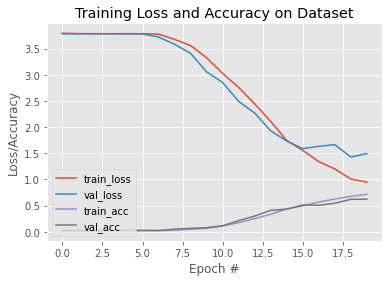

In [18]:
import matplotlib.pyplot as plt
# Plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(MODEL_PATH + os.path.sep + "plot.png")





In [ ]:
# save the model
model.save('pashto_model.h5')

# labels = [
#     'alif','','be','chay','daal','fay','gaaf','ghain','hay','haye','jim','kaaf','khay','khin','laam','mim','num',
#     'nunr','pe','qaaf','raay','ray','se','shin','sin','swaad','te','Tey','tsay','tway','tzay','wao','yay','yay1','yay2','yay3',
#     'yay4','zaal','zay','zhay','zhayghay','zwad','zway'
#     ]